In [96]:
%matplotlib inline
# Dependencies and Setup
#plotting code adapted from https://www.kaggle.com/balagpdy/heatmap-animation-us-drought-map
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_extraction import drought_data
from IPython.display import HTML
from Drought_Locations import drought_map
import datetime

### Store Part I results into DataFrame
* Load the csv exported in Part I to a DataFrame

In [97]:
drought_data=drought_data()


In [98]:
drought_data

,FIPS,releaseDate,NONE,D0,D1,D2,D3,D4,Level,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
0,1001,2000-01-31,0.000,25.000,75.000,0.000,0.0,0.0,1.75000,594.446,9.942,32.532237,-86.646440
1,1001,2000-02-29,0.000,100.000,0.000,0.000,0.0,0.0,1.00000,594.446,9.942,32.532237,-86.646440
2,1001,2000-03-31,0.000,68.145,31.855,0.000,0.0,0.0,1.31855,594.446,9.942,32.532237,-86.646440
3,1001,2000-04-30,1.775,98.225,0.000,0.000,0.0,0.0,0.98225,594.446,9.942,32.532237,-86.646440
4,1001,2000-05-31,0.000,19.048,78.608,2.344,0.0,0.0,1.83296,594.446,9.942,32.532237,-86.646440
...,...,...,...,...,...,...,...,...,...,...,...,...,...
652234,72153,2016-07-31,100.000,0.000,0.000,0.000,0.0,0.0,0.00000,67.711,0.628,18.085669,-66.857901
652235,72153,2016-08-31,100.000,0.000,0.000,0.000,0.0,0.0,0.00000,67.711,0.628,18.085669,-66.857901
652236,72153,2016-09-30,100.000,0.000,0.000,0.000,0.0,0.0,0.00000,67.711,0.628,18.085669,-66.857901
652237,72153,2016-10-31,100.000,0.000,0.000,0.000,0.0,0.0,0.00000,67.711,0.628,18.085669,-66.857901


In [99]:
drought_data["None Area"]=drought_data["NONE"]*drought_data["ALAND_SQMI"]/100/1000
drought_data["D0 Area"]=drought_data["D0"]*drought_data["ALAND_SQMI"]/100/1000
drought_data["D1 Area"]=drought_data["D1"]*drought_data["ALAND_SQMI"]/100/1000
drought_data["D2 Area"]=drought_data["D2"]*drought_data["ALAND_SQMI"]/100/1000
drought_data["D3 Area"]=drought_data["D3"]*drought_data["ALAND_SQMI"]/100/1000
drought_data["D4 Area"]=drought_data["D4"]*drought_data["ALAND_SQMI"]/100/1000
drought_data=drought_data[["None Area","D0 Area","D1 Area","D2 Area","D3 Area","D4 Area","releaseDate"]]


In [100]:
#drought_data["Total Area"]=drought_data["None Area"]+drought_data["D0 Area"]+drought_data["D1 Area"]+drought_data["D2 Area"]+drought_data["D3 Area"]+drought_data["D4 Area"]
#drought_data

In [101]:
drought_datay=drought_data.set_index('releaseDate').resample("M").sum()
#drought_datay["None Area Percentage"]=drought_datay["None Area"]/drought_datay["Total Area"]
#drought_datay["D0 Area Percentage"]=drought_datay["D0 Area"]/drought_datay["Total Area"]
#drought_datay["D1 Area Percentage"]=drought_datay["D1 Area"]/drought_datay["Total Area"]
#drought_datay["D2 Area Percentage"]=drought_datay["D2 Area"]/drought_datay["Total Area"]
#drought_datay["D3 Area Percentage"]=drought_datay["D3 Area"]/drought_datay["Total Area"]
#drought_datay["D4 Area Percentage"]=drought_datay["D4 Area"]/drought_datay["Total Area"]
#drought_datay

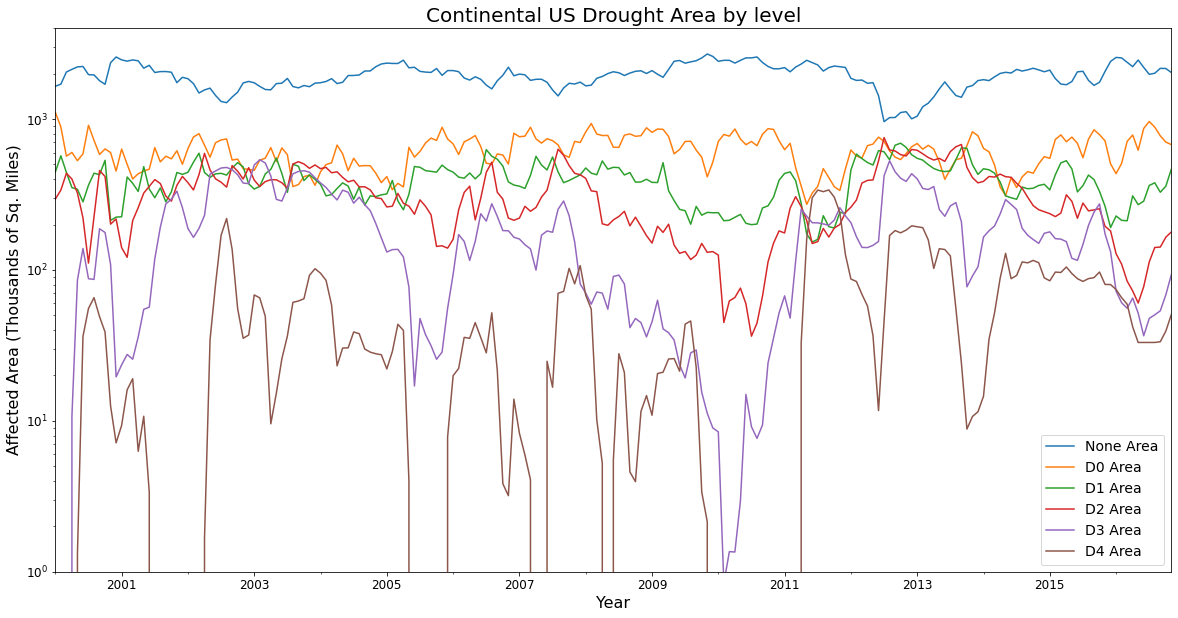

In [103]:
plot_area=drought_datay[["None Area","D0 Area","D1 Area","D2 Area","D3 Area","D4 Area"]]
#plot_area=drought_datay[["None Area Percentage", "D0 Area Percentage","D1 Area Percentage","D2 Area Percentage","D3 Area Percentage","D4 Area Percentage"]]
figure=plot_area.plot(kind="line",figsize=(20,10))
plt.yscale("log")
plt.ylabel("Affected Area (Thousands of Sq. Miles)", fontsize=16)
plt.yticks(fontsize=12)
plt.xlabel("Year", fontsize=16)
plt.ylim(1,4000)
plt.xticks(fontsize=12)
plt.title("Continental US Drought Area by level", fontsize=20)
plt.legend(fontsize=14)

0         0.00000
1         0.00000
2         0.00000
3         0.01775
4         0.00000
           ...   
652234    1.00000
652235    1.00000
652236    1.00000
652237    1.00000
652238    1.00000
Length: 652239, dtype: float64